# Coloured Noise
Ref:
- https://en.wikipedia.org/wiki/Colors_of_noise#Generation


## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from noise import brown_noise, pink_noise, white_noise, blue_noise, violet_noise
from noise import estimate_covariance_matrix
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Generate colour noise series


In [ ]:
noise_fns = {
    'brown' : brown_noise,
    'pink' : pink_noise,
    'white' : white_noise,
    'blue' : blue_noise,
    'violet' : violet_noise
}

In [ ]:
def plot_noise_series(time_steps):
    fig, ax_list = plt.subplots(5, 1, figsize=(12, 8), tight_layout=True)
    i = 0
    for c, l in zip(
            ['brown', 'pink', 'gray', 'blue', 'violet'],
            ['brown', 'pink', 'white', 'blue', 'violet']):
        ax = ax_list[i]
        t = range(0, time_steps)
        series = noise_fns[l](time_steps)
        ax.plot(t, series, color=c, label=l)
        ax.set_title(l)
        ax.set_xlabel("Time step")
        i += 1
    plt.suptitle(f"Coloured Noise Series (Time steps = {time_steps})")

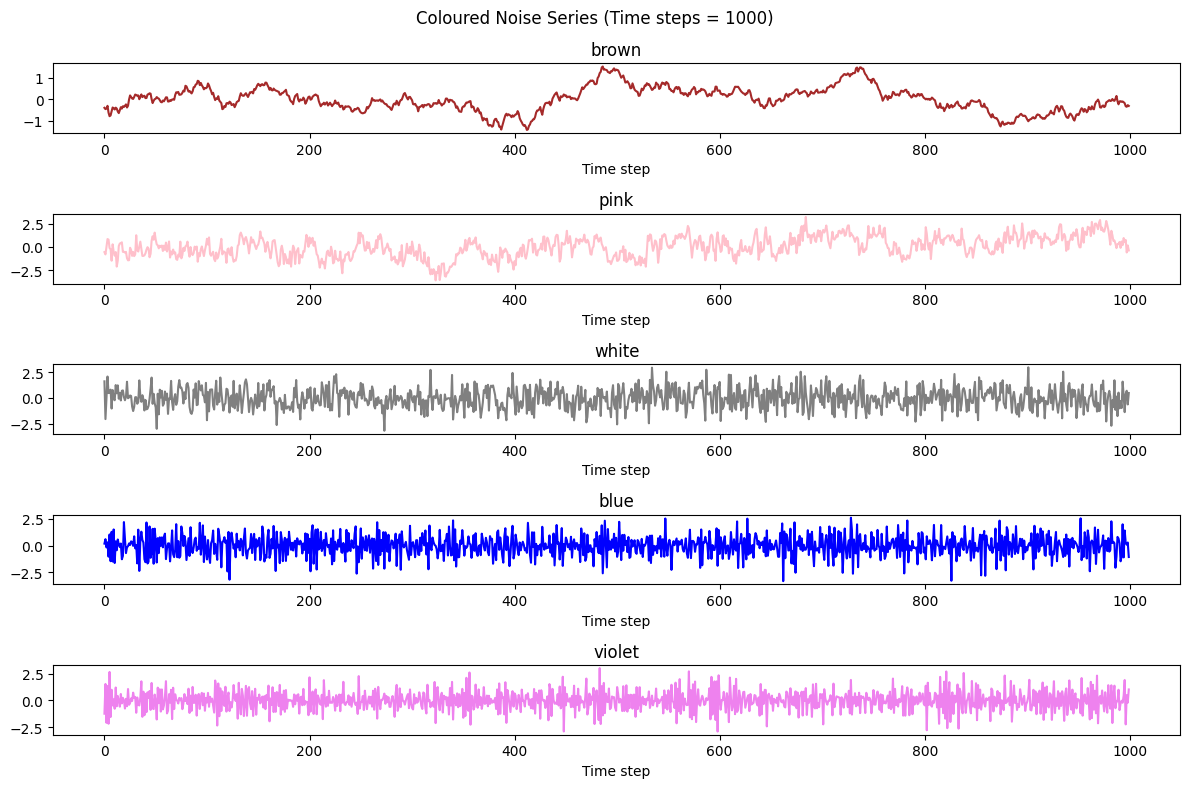

In [ ]:
plot_noise_series(1000)
plt.show()

## Autocorrelation
Ref:
- https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html

In [ ]:
def plot_noise_series_corr(time_steps):
    fig, ax_list = plt.subplots(5, 2, figsize=(24, 16), tight_layout=True)
    i = 0
    for c, l in zip(
            ['brown', 'pink', 'gray', 'blue', 'violet'],
            ['brown', 'pink', 'white', 'blue', 'violet']):
        axl, axr = ax_list[i]
        plot_acf(noise_fns[l](time_steps), ax=axl, c=c, title=f'ACF {l}')
        axl.set_xlabel("Lag")
        plot_pacf(noise_fns[l](time_steps), ax=axr, c=c, title=f'PACF {l}')
        axr.set_xlabel("Lag")
        i += 1
    plt.suptitle(f"Coloured Noise Series - Correlation")

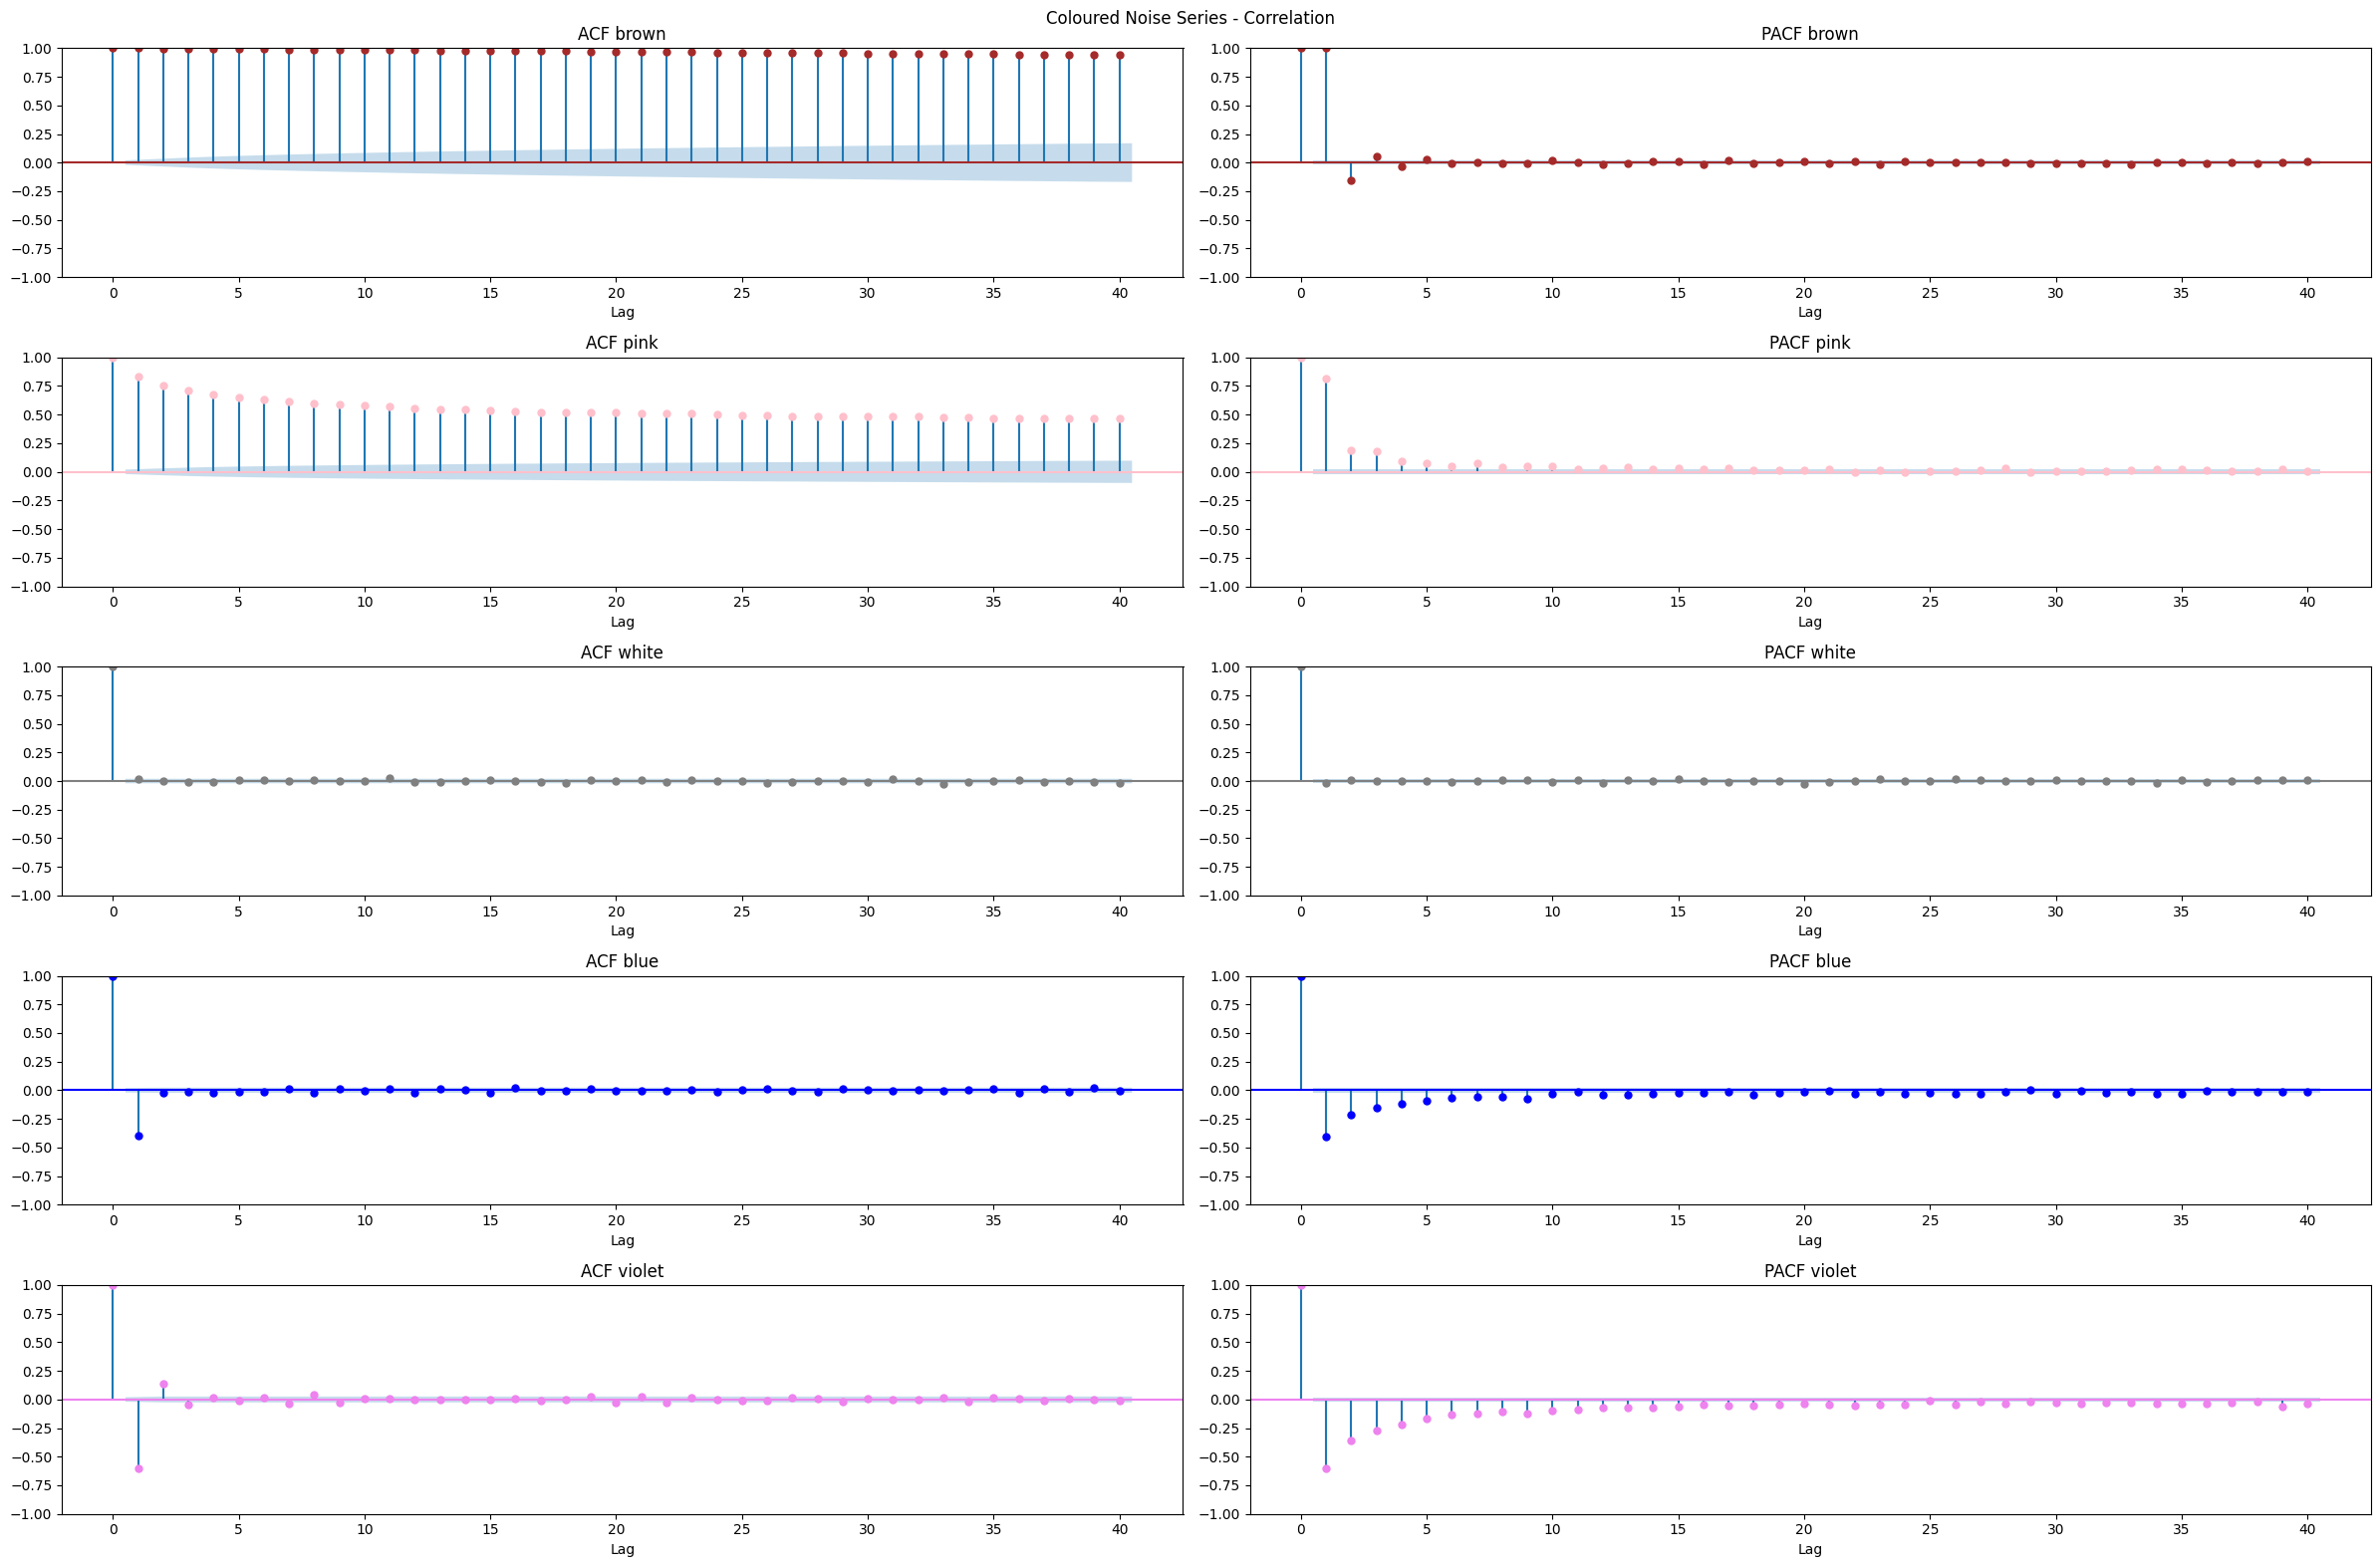

In [ ]:
plot_noise_series_corr(10000)

## Covariance Matrix

In [ ]:
def plot_noise_covariance():
    fig, ax_list = plt.subplots(1, 5, figsize=(60, 12), tight_layout=True)
    i = 0
    for c, l in zip(
            ['brown', 'pink', 'gray', 'blue', 'violet'],
            ['brown', 'pink', 'white', 'blue', 'violet']):
        ax = ax_list[i]
        covariance_matrix = estimate_covariance_matrix(noise_fns[l])
        ax.imshow(covariance_matrix, cmap='gray')
        ax.set_title(f'{l}')
        ax.set_xticks([])
        ax.set_yticks([])
        i += 1
    plt.suptitle(f"Coloured Matrix")

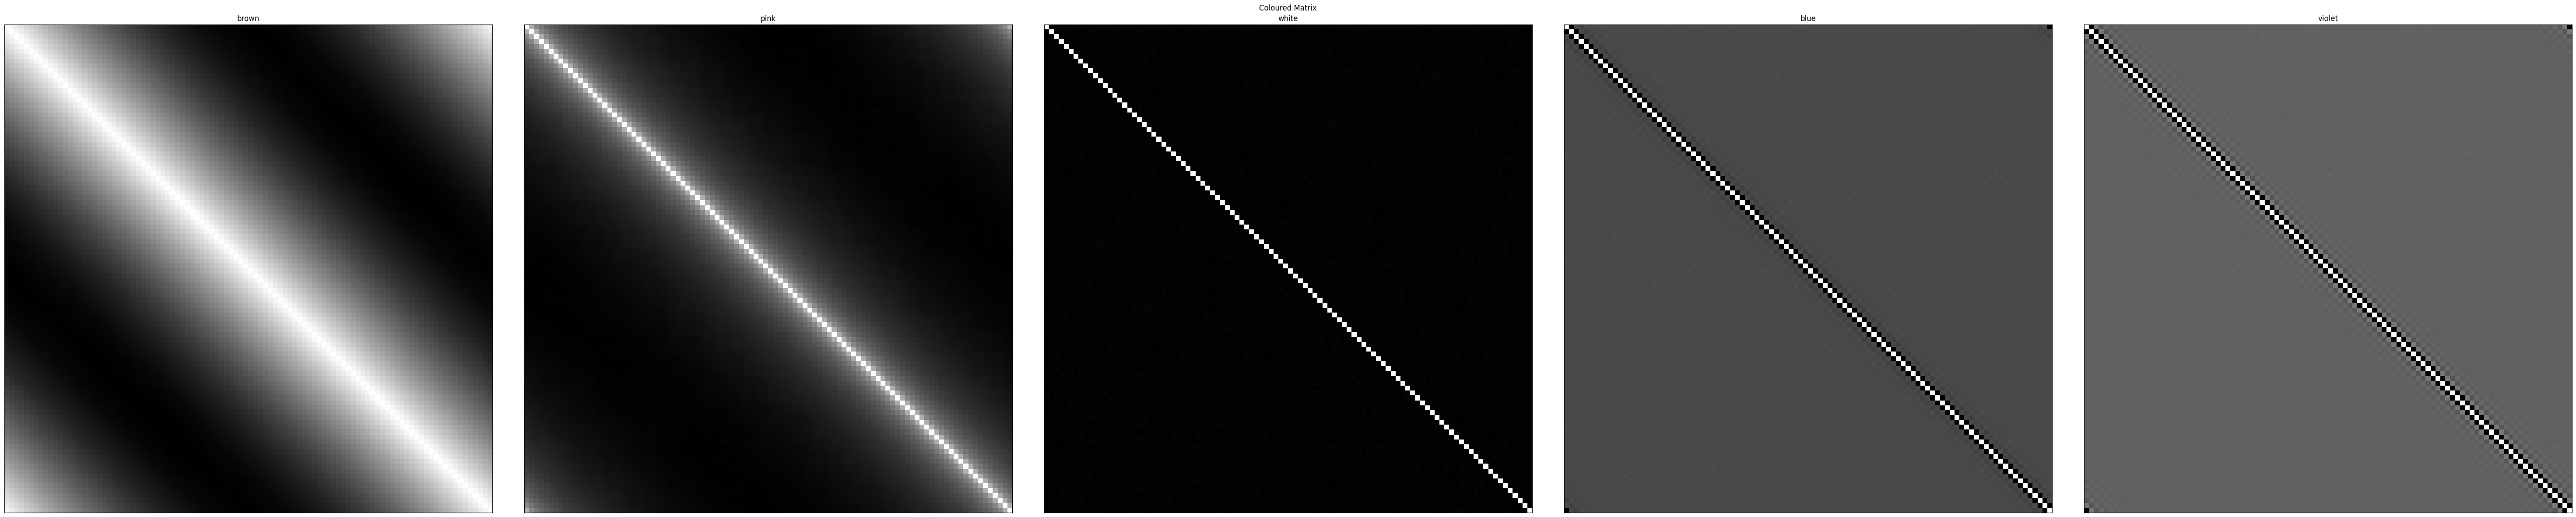

In [ ]:
plot_noise_covariance()